# Гипотеза-1 Ожирение(BMI) и диабет

## Предисловие
*   [Англоязычная статья про свзяь ожирения и высокого давления и нарушения работы сердечно-сосудистой системы](https://www.ahajournals.org/doi/10.1161/circresaha.116.305697)

*   [Холестерол и ожирение](https://www.obesityaction.org/resources/obesity-and-lipid-abnormalities-fact-sheet/#:~:text=Body%20shape%20and%20body%20fat,normal%2Dweight%20children%20and%20adolescents.)

В силу полученных графиков на этапе EDA сильная разница по признакам отсылающим нас на мысли о проверке статистической разницы о людях с ожирением и наличием диабета

## Нулевая и альтернативная гипотезы:

H₀: наличие диабета не связано с ожирением (Obese_flag).

H₁: у людей с ожирением доля диабета выше, чем у людей без ожирения.

In [ ]:
from scipy import stats
ct = pd.crosstab(df["Obese_flag"], df["Diabetes_binary"])
ct

Diabetes_binary,0,1
Obese_flag,,
0,151040,14789
1,67294,20557


In [ ]:
chi2= stats.chi2_contingency(ct)
chi2

Chi2ContingencyResult(statistic=np.float64(10041.85894023173), pvalue=np.float64(0.0), dof=1, expected_freq=array([[142723.54496216,  23105.45503784],
       [ 75610.45503784,  12240.54496216]]))

In [ ]:
prop_diab = ct.apply(lambda row: row[1] / row.sum(), axis=1)
prop_diab

,0
Obese_flag,
0,0.089182
1,0.233998


В выборке доля респондентов с диабетом среди лиц без ожирения составляет 8.9%, тогда как среди лиц с ожирением — 23.4% (разница 14.5 п.п.).
Согласно χ²-тесту независимости для таблицы Obese_flag × Diabetes_binary (χ²=10041.86, df=1, p < 0.001) связь между ожирением и диабетом статистически значима.

*   H₀: наличие диабета не связано с ожирением (Obese_flag). *отвергается*

**Это означает, что наличие ожирения существенно повышает вероятность диабета в рассматриваемой выборки.**

# Гипотеза-2 Образ жизни(lifestyle_score) и диабет

## Нулевая и альтернативная гипотезы:
H₀: средний Lifestyle_score одинаков у людей с диабетом и без.

H₁: у людей без диабета Lifestyle_score выше.

In [ ]:
df2=df.copy()
df2 = df.dropna(subset=["Lifestyle_score", "Diabetes_binary"])

score_no = df2.loc[df2["Diabetes_binary"] == 0, "Lifestyle_score"]
score_yes = df2.loc[df2["Diabetes_binary"] == 1, "Lifestyle_score"]

len(score_no), len(score_yes)



(3.0, 3.0)

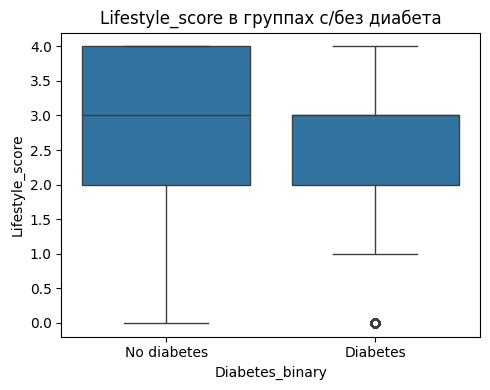

In [ ]:
plt.figure(figsize=(5,4))
sns.boxplot(x="Diabetes_binary", y="Lifestyle_score", data=df2)
plt.xticks([0,1], ["No diabetes", "Diabetes"])
plt.title("Lifestyle_score в группах с/без диабета")
plt.tight_layout()
plt.show()
print('Медиана у Diabetes по оси Y на уровне 3')

In [ ]:
sample_no = score_no.sample(5000)
sample_yes = score_yes.sample(5000)

print("Шапиро для группы без диабета:", stats.shapiro(sample_no))
print("Шапиро для группы с диабетом:", stats.shapiro(sample_yes))

Шапиро для группы без диабета: ShapiroResult(statistic=np.float64(0.8687114116472447), pvalue=np.float64(6.688378170270934e-54))
Шапиро для группы с диабетом: ShapiroResult(statistic=np.float64(0.8866621543816473), pvalue=np.float64(2.433369965487507e-51))


<Axes: xlabel='Lifestyle_score', ylabel='count'>

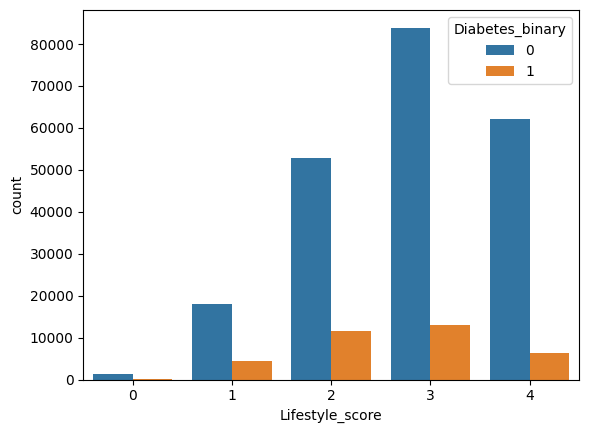

In [ ]:
sns.countplot(x="Lifestyle_score", hue="Diabetes_binary", data=df2)


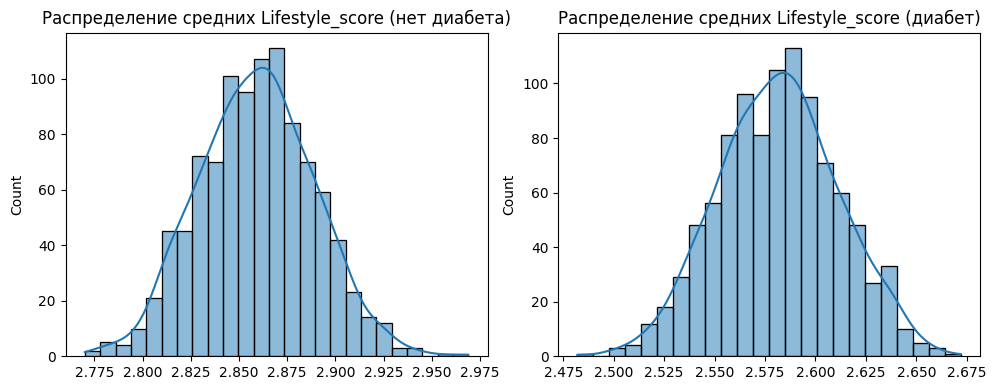

Шапиро для средних (нет диабета): ShapiroResult(statistic=np.float64(0.9988327738001154), pvalue=np.float64(0.7759406312022755))
Шапиро для средних (диабет): ShapiroResult(statistic=np.float64(0.9988003424025633), pvalue=np.float64(0.755118664244268))


In [ ]:
m = 1000
B = 1000

means_no = [score_no.sample(m, replace=True).mean() for _ in range(B)]
means_yes = [score_yes.sample(m, replace=True).mean() for _ in range(B)]

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.histplot(means_no, kde=True)
plt.title("Распределение средних Lifestyle_score (нет диабета)")
plt.subplot(1,2,2)
sns.histplot(means_yes, kde=True)
plt.title("Распределение средних Lifestyle_score (диабет)")
plt.tight_layout()
plt.show()
print("Шапиро для средних (нет диабета):", stats.shapiro(means_no))
print("Шапиро для средних (диабет):", stats.shapiro(means_yes))


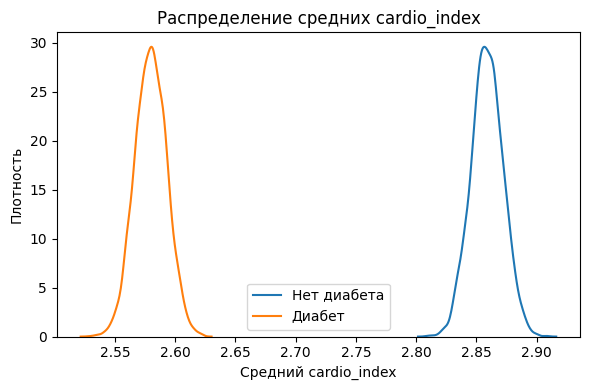

In [ ]:
m = 5000
B = 5000

means_no  = [score_no.sample(m, replace=True).mean() for _ in range(B)]
means_yes = [score_yes.sample(m, replace=True).mean() for _ in range(B)]

plt.figure(figsize=(6,4))

sns.kdeplot(means_no,  label="Нет диабета")
sns.kdeplot(means_yes, label="Диабет")

plt.title("Распределение средних cardio_index")
plt.xlabel("Средний cardio_index")
plt.ylabel("Плотность")
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
levene_res = stats.levene(score_no, score_yes, center="mean")
levene_res

LeveneResult(statistic=np.float64(235.95818690517564), pvalue=np.float64(3.1626260315151153e-53))

Если p < 0.05 → дисперсии существенно отличаются → берём t-test Уэлча.

In [ ]:
ttest_res = stats.ttest_ind(score_no, score_yes, equal_var=False)
ttest_res

TtestResult(statistic=np.float64(51.768363526989496), pvalue=np.float64(0.0), df=np.float64(47698.61036050658))

In [ ]:
mw_res = stats.mannwhitneyu(score_yes, score_no, alternative="less")
mw_res


MannwhitneyuResult(statistic=np.float64(3215120565.5), pvalue=np.float64(0.0))

In [ ]:
score_no.mean(), score_yes.mean()

(np.float64(2.858583637912556), np.float64(2.579839302891416))

*   Среднее значение показателя здорового образа жизни (Lifestyle_score) у респондентов без диабета составляет $\bar{x}_0$= 2.859 у респондентов с диабетом $\bar{x}_1$= 2.58
*   Дисперсии в группах статистически различаются (критерий Левена: p < 0.001),
поэтому для сравнения средних использован t-критерий Уэлча.

*   Результаты t-теста Уэлча показывают значимые различия средних (t = 51.77, df ≈ 47 699, p < 0.001): Lifestyle_score у респондентов с диабетом статистически значимо ниже, чем у респондентов без диабета.

*   Непараметрический критерий Манна–Уитни также подтверждает наличие различий между группами (p < 0.001), что говорит об устойчивости вывода при нарушении строгой нормальности распределения исходных данных. Это позволяет заключить, что люди с диабетом в среднем ведут менее здоровый образ жизни.

# Гипотеза-3 Соц-статус и диабет

## Предисловие

В этом пункте рассмотрено классическое предположение о том, что богатый слой общества может позволить себе более качественную пищу и здоровую пищу, а значит менее подвергнуты диабету

## Нулевая и альтернативная гипотезы:

H₀: средний soc_index одинаков у людей с диабетом и без.

H₁: у людей с диабетом soc_index ниже (ниже доход/образование).

In [ ]:
df3=df.copy()

In [ ]:
soc_no  = df3.loc[df3["Diabetes_binary"] == 0, "soc_index"]
soc_yes = df3.loc[df3["Diabetes_binary"] == 1, "soc_index"]

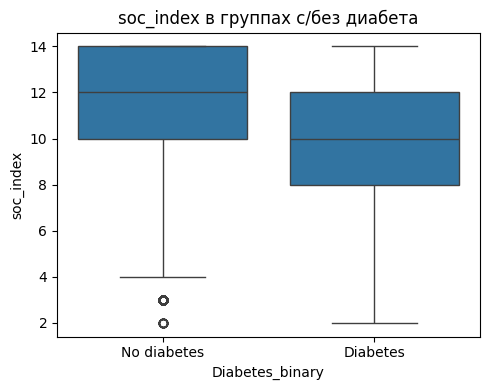

In [ ]:
plt.figure(figsize=(5,4))
sns.boxplot(x="Diabetes_binary", y="soc_index", data=df3)
plt.xticks([0,1], ["No diabetes", "Diabetes"])
plt.title("soc_index в группах с/без диабета")
plt.tight_layout()
plt.show()

In [ ]:
levene_soc = stats.levene(soc_no, soc_yes, center="mean")
print(levene_soc)

LeveneResult(statistic=np.float64(969.9069113716104), pvalue=np.float64(1.5774272963434358e-212))


In [ ]:
ttest_soc = stats.ttest_ind(soc_no, soc_yes, equal_var=False)
print(ttest_soc)

TtestResult(statistic=np.float64(82.69344662742182), pvalue=np.float64(0.0), df=np.float64(45249.18641595593))


In [ ]:
mw_soc = stats.mannwhitneyu(soc_yes, soc_no, alternative="less")  # диабетики < без диабета
print(mw_soc)


MannwhitneyuResult(statistic=np.float64(2785147908.5), pvalue=np.float64(0.0))


*   Для оценки связи социально-экономического статуса с диабетом был использован показатель soc_index (Income + Education).
*   Дисперсии этого показателя в группах с диабетом и без диабета статистически различаются (критерий Левена: p<0.001), поэтому применялся t-критерий Уэлча.
*   Результаты t-теста Уэлча показали значимые различия средних значений soc_index (t = 82.69, df ≈ 45 249, p\<0,001): у респондентов без диабета средний soc_index выше, чем у респондентов с диабетом.
*   Непараметрический критерий Манна–Уитни (альтернатива «диабетики < без диабета») также подтвердил этот результат (p<0,001), что говорит об устойчивости вывода при нарушении строгой нормальности распределения soc_index.

Таким образом, в нашей выборке наличие диабета связано с более низким социально-экономическим статусом (меньший уровень дохода и/или образования).

# Гипотеза-4 Cardio diseases и диабет

## Предисловие
Diabetes significantly raises the risk of heart diseases (CVD), making it the leading cause of death for people with diabetes, as high blood sugar damages blood vessels and nerves, increasing chances of heart attack, stroke, and heart failure, often alongside other risk factors like high blood pressure and cholesterol; managing blood sugar, blood pressure, cholesterol, and lifestyle is crucial for prevention.

[Ссылка на статью](https://www.niddk.nih.gov/health-information/diabetes/overview/preventing-problems/heart-disease-stroke#:~:text=Having%20diabetes%20means%20you%20are,2)

## Нулевая и альтернативная гипотезы:

H₀: средний cardio_index одинаков у людей с диабетом и без.

H₁: у людей с диабетом средний cardio_index ниже, т.е. у них больше сердечно-сосудистых проблем.

In [ ]:
df4=df.copy()

In [ ]:
cardio_no  = df4.loc[df4["Diabetes_binary"] == 0, "cardio_index"]
cardio_yes = df4.loc[df4["Diabetes_binary"] == 1, "cardio_index"]

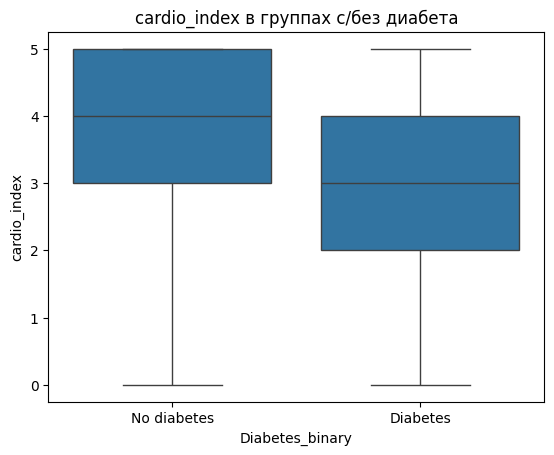

In [ ]:
sns.boxplot(x="Diabetes_binary", y="cardio_index", data=df2)
plt.xticks([0,1], ["No diabetes", "Diabetes"])
plt.title("cardio_index в группах с/без диабета")
plt.show()

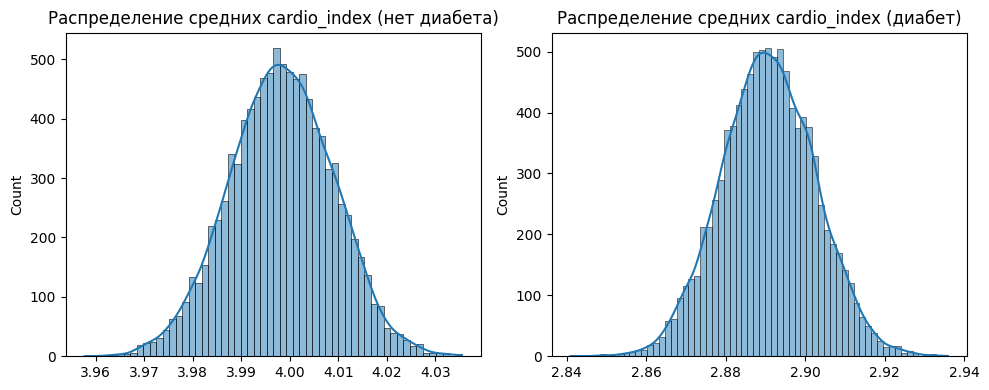

Шапиро для средних (нет диабета): ShapiroResult(statistic=np.float64(0.9997814086476478), pvalue=np.float64(0.4103243545872842))
Шапиро для средних (диабет): ShapiroResult(statistic=np.float64(0.9998455033957407), pvalue=np.float64(0.7587590402300615))


/usr/local/lib/python3.12/dist-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 10000.
  res = hypotest_fun_out(*samples, **kwds)


In [ ]:
m = 10000
B = 10000

means_no = [cardio_no.sample(m, replace=True).mean() for _ in range(B)]
means_yes = [cardio_yes.sample(m, replace=True).mean() for _ in range(B)]

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.histplot(means_no, kde=True)
plt.title("Распределение средних cardio_index (нет диабета)")
plt.subplot(1,2,2)
sns.histplot(means_yes, kde=True)
plt.title("Распределение средних cardio_index (диабет)")
plt.tight_layout()
plt.show()
print("Шапиро для средних (нет диабета):", stats.shapiro(means_no))
print("Шапиро для средних (диабет):", stats.shapiro(means_yes))


In [ ]:
levene_cardio = stats.levene(cardio_no, cardio_yes, center="mean")
print(levene_cardio)

LeveneResult(statistic=np.float64(615.3305671875377), pvalue=np.float64(1.1263297177527073e-135))


In [ ]:
ttest_cardio = stats.ttest_ind(cardio_no, cardio_yes, equal_var=False)
print(ttest_cardio)

TtestResult(statistic=np.float64(167.86667501916142), pvalue=np.float64(0.0), df=np.float64(45129.39808138712))


In [ ]:
mw_cardio = stats.mannwhitneyu(cardio_no, cardio_yes, alternative="greater")
print(mw_cardio)

MannwhitneyuResult(statistic=np.float64(5842002292.0), pvalue=np.float64(0.0))


In [ ]:
cardio_no.mean(), cardio_yes.mean()

(np.float64(3.998218326050913), np.float64(2.8906524076274542))

*   Для оценки связи диабета с сердечно-сосудистым состоянием был использован
интегральный показатель `cardio_index`, определяемый как сумму индикаторов отсутствия пяти основных проблем (повышенное давление, высокий холестерин, инсульт, инфаркт, трудности при ходьбе). Чем выше значение индекса, тем лучше состояние сердечно-сосудистой системы.

*   Среднее значение `cardio_index` у респондентов без диабета составило $\bar{x}_0 = 3.998$, у респондентов с диабетом — $\bar{x}_1 = 2.891$. Критерий Левена показал значимые различия дисперсий между группами ($p < 0.001$), поэтому для сравнения средних использовался t-критерий Уэлча. Результаты теста ($t = 167.87$, $df \approx 45\,129$, $p < 0.001$) свидетельствуют о статистически значимом снижении `cardio_index` у респондентов с диабетом по сравнению с остальными.

*   Непараметрический критерий Манна–Уитни (альтернатива «без диабета > диабет») также выявил значимые различия распределений ($p < 0.001$), что подтверждает устойчивость вывода при нарушении строгой нормальности распределения индекса. Таким образом, у людей с диабетом в среднем наблюдается более тяжёлое состояние сердечно-сосудистой системы.
